<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/YOLO_Image_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# yolov3.weights, yolov3-tiny.weights 파일 다운로드
from urllib.request import urlretrieve
urlretrieve('https://pjreddie.com/media/files/yolov3.weights','yolov3.weights')
urlretrieve('https://pjreddie.com/media/files/yolov3-tiny.weights', 'yolov3-tiny.weights')

('yolov3-tiny.weights', <http.client.HTTPMessage at 0x7fc8668fbe50>)

In [3]:
# yolov3.weights, yolov3-tiny.weights 파일 drive로 옮겨놓기
!mv yolov3.weights /content/gdrive/MyDrive/CV/Object\ Detection_YOLO
print('yolov3.weights move complete!!')

!mv yolov3-tiny.weights /content/gdrive/MyDrive/CV/Object\ Detection_YOLO
print('yolov3-tiny.weights move complete!!')

yolov3.weights move complete!!
yolov3-tiny.weights move complete!!


In [4]:
# dataset 다운로드
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 24.26 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [5]:
# 필요한 파일만 복사
!cp darknet/cfg/yolov3.cfg /content/gdrive/MyDrive/CV/Object\ Detection_YOLO
print('yolov3.cfg copy complete!!')

!cp darknet/cfg/yolov3-tiny.cfg /content/gdrive/MyDrive/CV/Object\ Detection_YOLO
print('yolov3-tiny.cfg copy complete!!')

!cp darknet/data/coco.names /content/gdrive/MyDrive/CV/Object\ Detection_YOLO
print('coco.names copy complete!!')

yolov3.cfg copy complete!!
yolov3-tiny.cfg copy complete!!
coco.names copy complete!!


In [6]:
# 다운 받았던 파일 제거
!rm -r darknet

In [7]:
# 모듈 임포트
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [8]:
# OpenCV 버전 확인
print('OpenCV version:', cv2.__version__)

OpenCV version: 4.6.0


In [9]:
# detection으로 인정할 최소 신뢰도 지정
min_confidence = 0.5

In [20]:
# YOLO 시작
net = cv2.dnn.readNet('/content/gdrive/MyDrive/CV/Object Detection_YOLO/yolov3.weights',
                      '/content/gdrive/MyDrive/CV/Object Detection_YOLO/yolov3.cfg')

classes = []    # detection 할 Object(Class) list 배열 정의

with open('/content/gdrive/MyDrive/CV/Object Detection_YOLO/coco.names', 'r') as f:
    # 80개의 Object(class)를 구분할 수 있는 Object의 이름을 classes 배열에 넣는다.
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Object 마다 컬러를 하나씩 다르게 지정
colors = np.random.uniform(0, 255, size = (len(classes), 3))

In [21]:
# 원본 이미지 로드
img = cv2.imread('/content/gdrive/MyDrive/CV/Object Detection_YOLO/image/image/Street.jpg')
img = cv2.resize(img, None, fx=0.7, fy=0.7)
height, width, channels = img.shape

# # # # Original Image # # # #


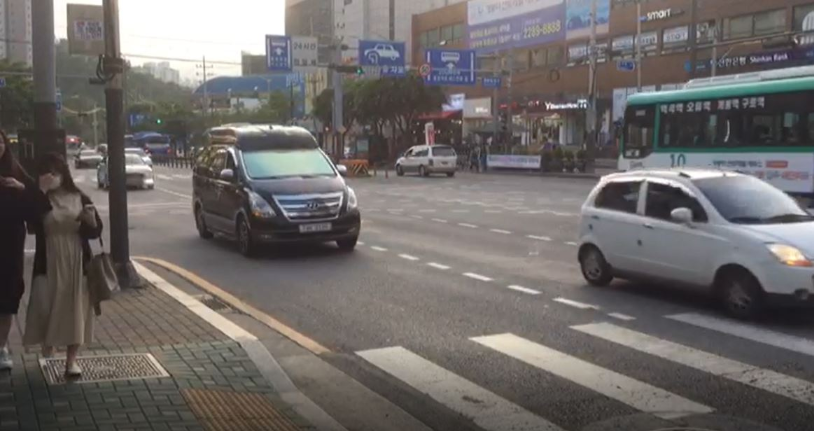

In [22]:
print('# # # # Original Image # # # #')
cv2_imshow(img)

1 bus
4 car
9 car
19 person
21 person
24 car
26 car
27 car


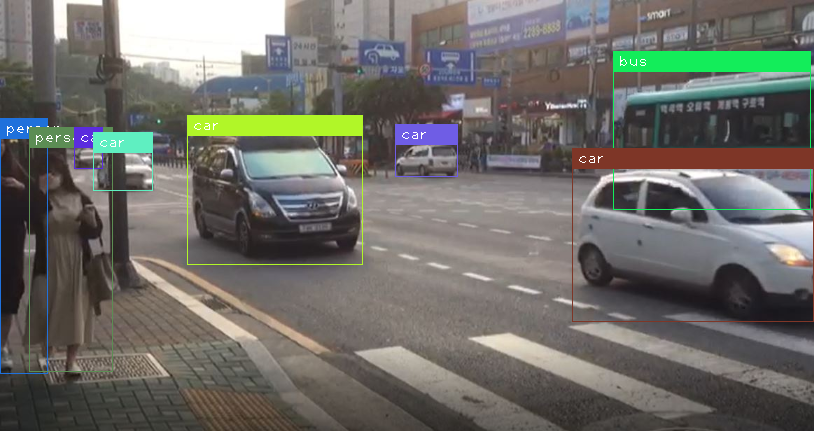

In [23]:
# Yolo3 Detecting model
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)   # outs에는 detection 된 Object가 있음

class_ids = []          # detection 한 Class id 저장하는 배열
confidences = []        # detection 한 Class의 신뢰도를 저장하는 배열
boxes = []              # detection 한 boxing 정보를 저장하는 배열

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)    # detection 한 Class id
        confidence = scores[class_id]   # detection 한 Class의 신뢰도
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])              # boxing 정보를 boxes 배열에 저장
            confidences.append(float(confidence))   # 신뢰도를 confidences 배열에 저장
            class_ids.append(class_id)              # Class id 를 class_ids 배열에 저장

# 박스안에 박스(노이즈)를 하나로 만들어준다.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:    # 노이즈가 제거된 박스만 표시
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])      # Class 이름
        print(i, label)

        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
        cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)

cv2_imshow(img)

# # # # Original Image # # # #


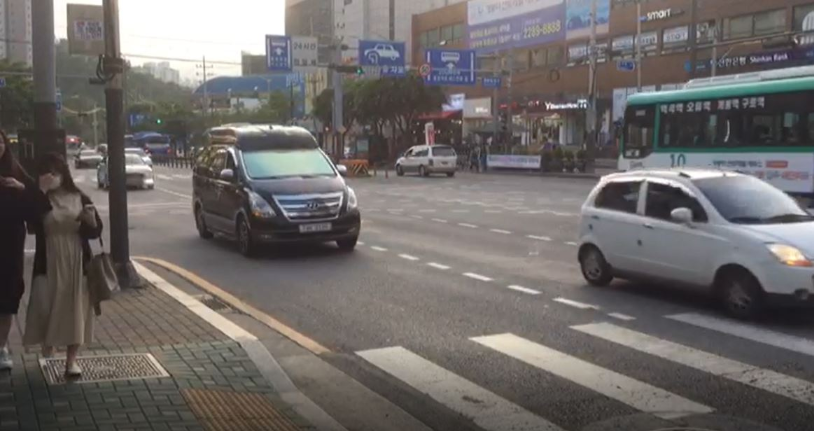

4 car
9 car
24 car
26 car
27 car
# # # # Detected Image # # # #


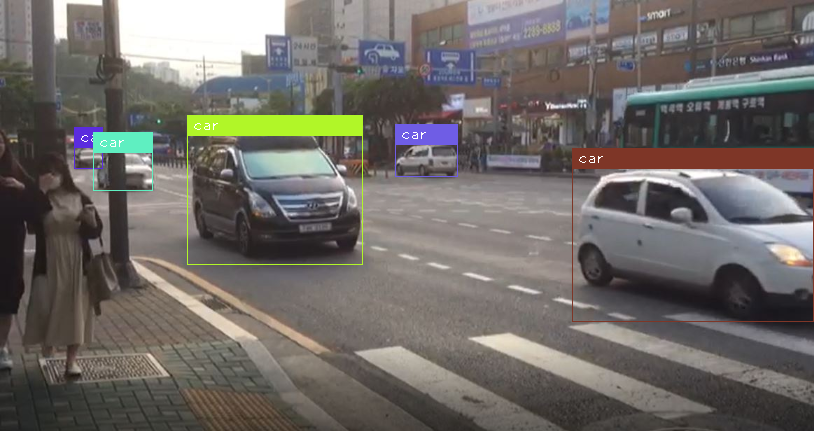

In [29]:
# 원본 이미지 로드
img = cv2.imread('/content/gdrive/MyDrive/CV/Object Detection_YOLO/image/image/Street.jpg')
img = cv2.resize(img, None, fx=0.7, fy=0.7)
height, width, channels = img.shape

print('# # # # Original Image # # # #')
cv2_imshow(img)

# Yolo3 Detecting model
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)   # outs에는 detection 된 Object가 있음

class_ids = []          # detection 한 Class id 저장하는 배열
confidences = []        # detection 한 Class의 신뢰도를 저장하는 배열
boxes = []              # detection 한 boxing 정보를 저장하는 배열

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)    # detection 한 Class id
        confidence = scores[class_id]   # detection 한 Class의 신뢰도
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])              # boxing 정보를 boxes 배열에 저장
            confidences.append(float(confidence))   # 신뢰도를 confidences 배열에 저장
            class_ids.append(class_id)              # Class id 를 class_ids 배열에 저장

# 박스안에 박스(노이즈)를 하나로 만들어준다.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:    # 노이즈가 제거된 박스만 표시
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])      # Class 이름
        if label == 'car':                      # Class 가 car인 것만 화면에 표시
            print(i, label)

            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
            cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
            cv2.putText(img, label, (x + 5, y - 5), font, 1, (255, 255, 255), 1)

print('# # # # Detected Image # # # #')
cv2_imshow(img)